<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/Medium/Tabulation_of_the_Performance_of_the_Martingale_on_the_NASDAQ_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.4 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from yfinance import download

# this list created 2021-12-26, you must use Adjusted Close 
# not simple Close to account for splits/dividends etc
prices=download(["AAPL", "ABNB", "ADBE", "ADI", "ADP", "ADSK", "AEP", "ALGN", "AMAT", "AMD", "AMGN", "AMZN", "ANSS", "ASML", "ATVI", "AVGO", "BIDU", "BIIB", "BKNG", "CDNS", 
                 "CHTR", "CMCSA", "COST", "CPRT", "CRWD", "CSCO", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DOCU", "DXCM", "EA", "EBAY", "EXC", "FAST", "FB", "FISV", "FTNT", 
                 "GILD", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", "INTU", "ISRG", "JD", "KDP", "KHC", "KLAC", "LCID", "LRCX", "LULU", "MAR", "MCHP", "MDLZ", "MELI", 
                 "MNST", "MRNA", "MRVL", "MSFT", "MTCH", "MU", "NFLX", "NTES", "NVDA", "NXPI", "OKTA", "ORLY", "PANW", "PAYX", "PCAR", "PDD", "PEP", "PTON", "PYPL", "QCOM", 
                 "REGN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "SPLK", "SWKS", "TEAM", "TMUS", "TSLA", "TXN", "VRSK", "VRSN", "VRTX", "WBA", "WDAY", "XEL", "XLNX", "ZM", 
                 "ZS"])["Adj Close"] 
prices

[*********************100%***********************]  101 of 101 completed


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,AMZN,ANSS,ASML,ATVI,AVGO,BIDU,BIIB,BKNG,CDNS,CHTR,CMCSA,COST,CPRT,CRWD,CSCO,CSX,CTAS,CTSH,DDOG,DLTR,DOCU,DXCM,EA,EBAY,EXC,FAST,FB,FISV,FTNT,...,MRNA,MRVL,MSFT,MTCH,MU,NFLX,NTES,NVDA,NXPI,OKTA,ORLY,PANW,PAYX,PCAR,PDD,PEP,PTON,PYPL,QCOM,REGN,ROST,SBUX,SGEN,SIRI,SNPS,SPLK,SWKS,TEAM,TMUS,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,1.044719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,1.042816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,1.027592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,1.004756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.997145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,173.070007,163.990005,520.599976,172.000000,228.750000,259.100006,90.980003,524.630005,167.000000,136.880005,235.360001,3242.760010,348.540009,744.530029,65.389999,596.369995,154.529999,239.300003,2450.949951,161.750000,607.690002,51.680000,502.989990,136.710007,176.699997,61.360001,36.439999,397.450012,87.199997,138.279999,130.809998,130.440002,447.339996,130.440002,63.450001,56.240002,59.200001,331.899994,109.110001,312.540009,...,204.729996,83.000000,310.200012,121.150002,97.360001,525.690002,103.360001,269.420013,225.289993,204.410004,678.869995,499.109985,125.000000,96.500000,60.410000,175.639999,31.330000,178.419998,188.690002,615.239990,102.269997,100.120003,137.089996,6.18,326.160004,122.620003,155.649994,297.390015,108.519997,1049.609985,187.009995,198.149994,226.479996,234.059998,54.299999,254.309998,68.970001,198.449997,159.720001,254.740005
2022-01-18,169.800003,154.690002,513.340027,166.500000,226.440002,252.029999,90.320000,489.559998,152.360001,131.929993,233.830002,3178.350098,337.540009,715.229980,82.309998,577.789978,152.940002,233.809998,2384.209961,153.529999,582.750000,50.180000,488.070007,132.940002,172.850006,59.730000,35.250000,391.059998,86.190002,131.869995,129.039993,127.309998,429.869995,133.910004,61.610001,56.040001,58.389999,318.149994,106.400002,308.470001,...,186.610001,77.669998,302.649994,115.870003,92.870003,510.799988,101.739998,259.029999,217.419998,197.199997,665.669983,502.369995,123.029999,95.970001,61.529999,173.960007,30.23

In [ ]:
areturn,correl=pd.DataFrame(),{}

for ticker in prices:
    p,q=prices[ticker],prices[ticker].shift()
    areturn[ticker]=abs((p-q)/p)*1e2
    correl[ticker]=pd.DataFrame({0:p,1:q}).corr().loc[0,1]*1e2

scores=pd.DataFrame({
    "MAPE":areturn.mean(axis=0),
    "RMSPE":areturn.apply(lambda x:x*x).mean(axis=0).apply(np.sqrt),
    "R²":pd.DataFrame({"Correlation":correl.values()},index=correl.keys())["Correlation"].apply(lambda x:x*x/1e2)

})
scores

,MAPE,RMSPE,R²
AAPL,1.954763,2.997943,99.957328
ABNB,2.495090,3.356695,91.354574
ADBE,2.067971,3.127927,99.942176
ADI,1.906305,2.773019,99.926120
ADP,1.139935,1.678411,99.963973
...,...,...,...
WDAY,1.689802,2.422955,99.726020
XEL,0.883706,1.476112,99.967544
XLNX,2.156006,3.136221,99.862225
ZM,2.838248,4.158657,99.218184


,MAPE,RMSPE,R²
count,101.000000,101.000000,101.000000
mean,1.949706,2.965117,99.733931
std,0.596417,0.947107,0.935439
min,0.880444,1.312120,91.354574
25%,1.534590,2.245941,99.843236
50%,1.957346,3.030257,99.909653
75%,2.279190,3.539580,99.944140
max,3.901999,6.770020,99.975645


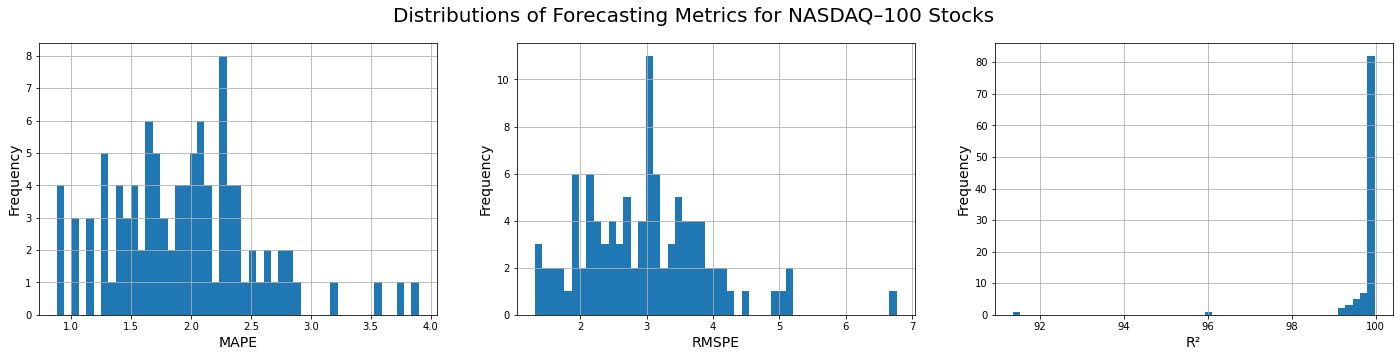

In [ ]:
import matplotlib.pyplot as pl
golden_ratio=(1e0+np.sqrt(5e0))/2e0
figure,plots=pl.subplots(1,3,figsize=(15*golden_ratio,15/3))
title='Distributions of Forecasting Metrics for NASDAQ–100 Stocks'
figure.suptitle(title,fontsize=20)

for score in scores:
    plot=plots[list(scores).index(score)]
    scores[score].hist(ax=plot,bins=np.linspace(min(scores[score]),max(scores[score]),50))
    plot.set_xlabel(score,fontsize=14)
    plot.set_ylabel("Frequency",fontsize=14)

scores.describe()